In [37]:
import math
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation

In [26]:
def get_data(file: str) -> pd.DataFrame:
    data = []
    with open(f"data\\{file}", "r") as file:
        for idx, line in enumerate(file.readlines()):
            # Skip Metadata lines
            if idx in [0, 1, 2, 3, 4, 6]:
                continue

            data.append(line)

    return pd.read_csv(StringIO("".join(data))).rename(
        columns={
            "Load (lbf)": "Load (lbs)",
        }
    )

In [27]:
brush_tests = [
    "1",
    "2",
    "3",
    "4",
    "5",
    "5a",
    "6",
    "7",
    "8",
    "9",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
]

dataframes = {}
for brush in brush_tests:
    dataframes[brush] = get_data(f"Ankenman brushes_{brush}.txt")

In [28]:
df = (
    pd.concat(
        [df.reset_index(drop=True) for df in dataframes.values()],
        keys=dataframes.keys(),
        names=["Brush"],
    )
    .reset_index()
    .drop(columns=["level_1"])
)

df

,Brush,Time (s),Load (lbs),Crosshead (in)
0,1,0.40,0,0.000
1,1,0.60,0,0.000
2,1,0.80,0,0.000
3,1,1.00,0,0.001
4,1,1.20,0,0.001
...,...,...,...,...
19939,15,123.30,155,0.242
19940,15,123.40,155,0.242
19941,15,123.50,154,0.242
19942,15,123.60,153,0.243


In [29]:
df_load_max = df.groupby("Brush").max()[["Load (lbs)"]]
df_load_max

,Load (lbs)
Brush,
1,216
10,245
11,151
12,221
13,148
14,129
15,159
2,107
3,152


# Data Visualization

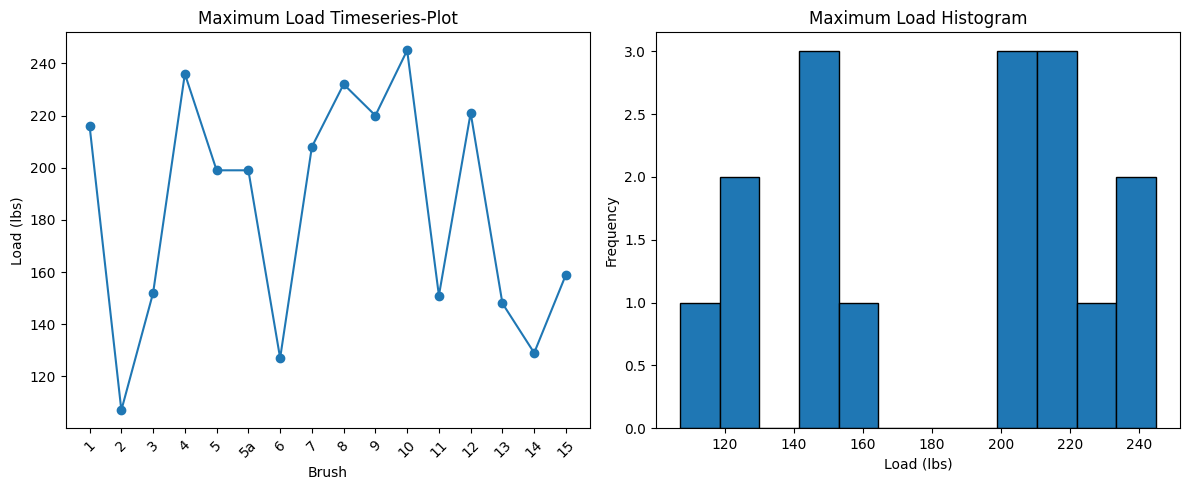

In [30]:
load_max_values = [df_load_max.loc[brush, "Load (lbs)"] for brush in brush_tests]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Timeseries Line Plot
axs[0].plot(brush_tests, load_max_values, marker="o")
axs[0].set_title("Maximum Load Timeseries-Plot")
axs[0].set_xlabel("Brush")
axs[0].set_ylabel("Load (lbs)")
axs[0].tick_params(axis="x", rotation=45)  # Rotate x-axis if needed

# Histogram
axs[1].hist(df_load_max["Load (lbs)"], bins=12, edgecolor="black")
axs[1].set_title("Maximum Load Histogram")
axs[1].set_xlabel("Load (lbs)")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Sample Statistics

In [ ]:
n = len(df_load_max)
sample_mean = df_load_max["Load (lbs)"].mean()
sample_median = df_load_max["Load (lbs)"].median()
sample_stddev = df_load_max["Load (lbs)"].std()

print(f"Sample Size:\t{n}")
print(f"Sample Mean:\t{sample_mean:.2f} lbs")
print(f"Sample Median:\t{sample_median:.2f} lbs")
print(f"Sample Stddev:\t{sample_stddev:.2f} lbs")

Sample Size:	16
Sample Mean:	184.31 lbs
Sample Median:	199.00 lbs
Sample Stddev:	44.48 lbs


# E1 Estimate

$$
E1 = \bar{x} + 1.28 \cdot s
$$

In [61]:
E1 = sample_mean - 1.28 * sample_stddev
print(f"{E1=:.2f}")

E1=127.38


# E2 Estimate

$$
\text{For a dataset } \{x_1, x_2, \dots, x_n\} \text{ where } x_1 \leq x_2 \leq \dots \leq x_n, \text{ the estimation of the } p\text{th percentile (denoted as } E2 \text{) for a sample of size } n \text{ is given by:}
$$


$$
i = \frac{p \cdot n}{100} + 0.5
$$

$$
E2 = x_{\lfloor i \rfloor} + (i - \lfloor i \rfloor) \cdot \left( x_{\lceil i \rceil} - x_{\lfloor i \rfloor} \right)
$$


In [62]:
p = 10
i = (p * n) / 100 + 0.5  # Derived from Textbook-Formula
# Linear Interpolation
x0, x1 = math.floor(i), math.ceil(i)
y0, y1 = sorted(load_max_values)[x0 - 1], sorted(load_max_values)[x1 - 1]
E2 = y0 + (i - x0) * (y1 - y0)

print(f"{E2=:.2f}")

E2=127.20
